In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
#'MeanGradient', 'MaxPoint', 'DistRatio', 'PreviousChange','MeanGOther', 'PChangeOther', 'MaxPointOther', 'DistRatOther'
PreX_train = [pd.concat([pd.read_csv("NewML/ML2016.csv"), pd.read_csv("NewML/ML2014.csv"), pd.read_csv("NewML/ML2019.csv"), 
              pd.read_csv("NewML/ML2015.csv"), pd.read_csv("NewML/ML2018.csv")])]
PreX_test = pd.read_csv("NewML/ML2017.csv")
X_test = PreX_test.dropna()
y_test = X_test['Type'].replace(2, 1, regex=True)
X_test = X_test[['MeanGradient', 'MaxPoint', 'PreviousChange',
                 'MeanGOther', 'PChangeOther', 'MaxPointOther', 'DistRatOther', 'DistRatio',
                 'BZE', 'BZM', 'Speed', 'Press', 'AE', 'AL']]

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from  sklearn.preprocessing import *
from sklearn.linear_model import*

def myround(x, base):
    return base * round(x/base)
main = set()
mainTemp = set()
Dic = {}
DicTemp = {}
wit = 1

for data in PreX_train:
    X_train = data.dropna()
    y_train = X_train['Type'].replace(2, 1, regex=True)
    X_train = X_train[['MeanGradient', 'MaxPoint', 'PreviousChange',
                       'MeanGOther', 'PChangeOther', 'MaxPointOther', 'DistRatOther', 'DistRatio',
                       'BZE', 'BZM', 'Speed', 'Press', 'AE', 'AL']]
    
    for number in range(0, 10):
        clfD = DecisionTreeClassifier(class_weight = {1: 20}, max_depth=70).fit(X_train, y_train)
        l = clfD.predict(X_test)
        temp = X_test[l==wit].index
        
        for i in temp:        
            numb = myround(i, 60)
            if numb in mainTemp:
                mainTemp.add(0)           
            else:
                if numb in DicTemp:
                    DicTemp[numb]+=1
                else:
                    DicTemp[numb]=1
            mainTemp.add(numb)
        mainTemp.clear()
        
    for stu in DicTemp:
        if DicTemp[stu]==10:
            if stu in Dic:
                Dic[stu]+=1
            else:
                Dic[stu]=1
    DicTemp.clear()

for stu in Dic:
    if Dic[stu]>=1:
        main.add(stu)
    
main = sorted(main)
for i in main:
    print(i, end = " ")
print("\n\n", len(main))

36480 142620 155040 207240 262560 262740 272160 282600 348600 349920 358560 366960 369300 426720 

 14


In [4]:
PreX_test = pd.read_csv("NewML/ML2017.csv")
PreX_test[(PreX_test["Type"]>=1)].iloc[0:60, [1, 4,7, 12, 13, 14, 15, 16, 17]].dropna()

,Type,MaxPoint,OtherH,BZE,BZM,Speed,Press,AE,AL
36493,2,11,-10,-4.00,-3.35,364.6,3.01,50,-33
36494,2,10,-10,-3.82,-3.17,364.6,3.01,47,-30
36495,2,9,-10,-4.30,-3.75,364.6,3.01,47,-29
159317,1,4,14,-1.03,0.57,542.3,6.16,513,-452
159318,1,3,15,1.74,2.61,543.8,6.19,496,-427
159319,1,2,16,2.20,3.24,536.6,7.02,459,-408
178403,1,7,28,1.46,-0.41,353.7,5.20,53,-21
178404,1,6,28,5.80,4.13,353.7,5.20,90,-44
178405,1,5,26,8.20,6.07,353.8,3.14,114,-60
193514,1,9,30,-1.72,-1.07,343.9,14.48,519,-279


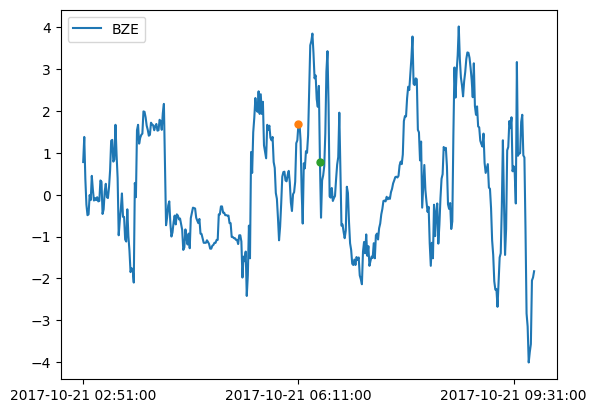

In [86]:
suu = 422291	                      	                  
maxp = PreX_test["MaxPoint"].iloc[suu]
width = 200
xpoints = np.array(PreX_test["DateTime"].iloc[suu-width:suu+width+maxp])
ypoints = np.array(PreX_test["BZE"] .iloc[suu-width:suu+width+maxp])
#ypoints1 = np.array(PreX_test["Press"] .iloc[suu-width:suu+width+maxp])
#ypoints2 = np.array(PreX_test["AE"] .iloc[suu-width:suu+width+maxp])

plt.plot(xpoints, ypoints, label="BZE")
#plt.plot(xpoints, ypoints1, label="Press")
#plt.plot(xpoints, ypoints2, label="AE")

plt.plot(xpoints[width], ypoints[width], marker="o", markersize=5)
plt.plot(xpoints[width+maxp], ypoints[width+maxp], marker="o", markersize=5)
plt.xticks([0, width, width*2])
plt.yscale('linear')
plt.legend(loc="upper left")
plt.show()

#xpoints1 = np.array(df["BzE"].iloc[suu-width:suu+width+maxp].index)
#ypoints1 = np.array(df["BzE"].iloc[suu-width:suu+width+maxp])
#xpoints2 = np.array(df["Pres"].iloc[suu-width:suu+width+maxp].index)
#ypoints2 = np.array(df["Pres"].iloc[suu-width:suu+width+maxp])
#plt.plot(xpoints1, ypoints1,  label="IMF BzE")
#plt.plot(xpoints2, ypoints2,  label="Pressure")
#plt.loglog(xpoints1[width], ypoints1[width], marker="o", markersize=5)
#plt.loglog(xpoints2[width], ypoints2[width], marker="o", markersize=5)

In [15]:
#PreX_test.iloc[suu:suu+30]

In [6]:
""""
X_train = PreX_train[0]
X_train = X_train.dropna()
y_train = X_train['Type'].replace(2, 1, regex=True)
X_train = X_train[['MeanGradient', 'MaxPoint', 'PreviousChange',
                   'MeanGOther', 'PChangeOther', 'MaxPointOther', 'DistRatOther', 'DistRatio']]
X_test = pd.read_csv("ML2014.csv")
X_test = X_test.dropna()
y_test = X_test['Type'].replace(2, 1, regex=True)
X_test = X_test[['MeanGradient', 'MaxPoint', 'PreviousChange',
                 'MeanGOther', 'PChangeOther', 'MaxPointOther', 'DistRatOther', 'DistRatio']]
importance = np.array([0, 0, 0, 0, 0, 0, 0, 0])
for i in range(0,50):
    clfD = DecisionTreeClassifier(class_weight = 'balanced', max_depth=30).fit(X_train, y_train)
    importance = importance + clfD.feature_importances_
importance = list(importance/50)

ind = [importance.index(i) for i in sorted(importance, reverse=True)]
for i in ind:
    print(X_train.columns[i], ': ', importance[i])
"""
2

2

PChangeOther :  0.37616510955881516
MeanGOther :  0.20805968374414788
dbn_nez :  0.11248257088661856
PreviousChange :  0.11067556027145951
MeanGradient :  0.09587584839792983
MaxPointOther :  0.04873635582105554
MaxPoint :  0.04800487131997364

precision {'class_weight': {1: 20}, 'max_depth': 70}  {'class_weight': 'balanced', 'max_depth': 30}
recall {'class_weight': 'balanced', 'max_depth': 10}

BIG:
class_weight = 'balanced', max_depth=30:
MeanGOther :  0.9872417649205167
MeanGradient :  0.006686358207849944
PChangeOther :  0.003269756731754063
PreviousChange :  0.001939027058299882
MaxPointOther :  0.00044061760915292404
dbn_nez :  0.00037961151778053424
MaxPoint :  4.28639546459116e-05

precision {'class_weight': 'balanced', 'max_depth': 30}

In [7]:
"""
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train = PreX_train[0]
X_train = X_train.dropna()
y_train = X_train['Type'].replace(2, 1, regex=True)
X_train = X_train[['MeanGradient', 'MaxPoint', 'PreviousChange',
                   'MeanGOther', 'PChangeOther', 'MaxPointOther']]
X_test = pd.read_csv("ML2014.csv")
X_test = PreX_test.dropna()
y_test = X_test['Type'].replace(2, 1, regex=True)
X_test = X_test[['MeanGradient', 'MaxPoint', 'PreviousChange',
                 'MeanGOther', 'PChangeOther', 'MaxPointOther']]

clf = DecisionTreeClassifier()
grid_params = {'class_weight':[None,'balanced',{1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}],
               'max_depth':[None]+list(np.linspace(10, 100, 10, dtype = int))}
grid_ans = GridSearchCV(clf, param_grid = grid_params , scoring = 'precision')
grid_ans.fit(X_train, y_train)
y_scores = grid_ans.predict(X_test)
print(grid_ans.best_params_)
print(grid_ans.best_score_)    
print(recall_score(y_test, y_scores), " ", precision_score(y_test, y_scores))
"""
2

2